In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Markdown commands - do not edit
$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

# Exploring Qubits with Qiskit

In [2]:
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit
initial_state = [0,1]  # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialization operation to the 0th qubit
qc.draw()

┌─────────────────┐
q: ┤ Initialize(0,1) ├
   └─────────────────┘

In [3]:
sim = Aer.get_backend('aer_simulator') # Tell Qiskit how to simulate our circuit

In [4]:
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit
initial_state = [0,1]  # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialization operation to the 0th qubit
qc.save_statevector() # Save statevector so we can examine it after the simulation is run
qobj = assemble(qc)    # Create a Qobj from the circuit for the simulator to run
result = sim.run(qobj).result() # Run the simulation and return the result

In [5]:
out_state = result.get_statevector()
print(out_state)

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


In [6]:
qc.measure_all()
qc.draw()

┌─────────────────┐ ░  ░ ┌─┐
     q: ┤ Initialize(0,1) ├─░──░─┤M├
        └─────────────────┘ ░  ░ └╥┘
meas: 1/══════════════════════════╩═
                                  0

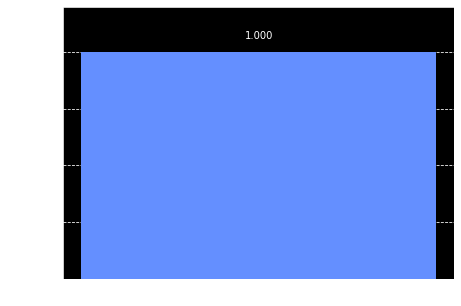

In [7]:
counts = result.get_counts()
plot_histogram(counts)

In [8]:
qc = QuantumCircuit(1)
initial_state = [1/sqrt(2), 1j/sqrt(2)] # Define state |q_0> in superposition
qc.initialize(initial_state, 0) # Initialize the 0th qubit in the state `initial_state`
qc.save_statevector() # Save statevector so we can examine it after the simulation is run
qobj = assemble(qc) # Create a Qobj from the circuit for the simulator to run
result = sim.run(qobj).result() # Do the simulation and return the result

In [9]:
out_state = result.get_statevector()
print(out_state)

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


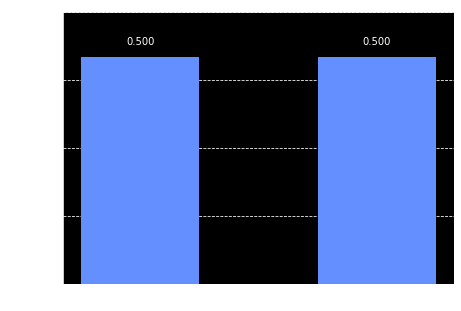

In [10]:
counts = result.get_counts()
plot_histogram(counts)

# The Rules of Measurement

| Name | Vector type | Example |
| ---- | ----- | ----- |
| Bra | Row | $$\bra{x}$$ |
| Ket | Column | $$\ket{y}$$ |

### 2.3 - A Very Important Rule
$$p(\ket{x}) = |\braket{x}{\psi}|^2$$

In [13]:
# Run the code in this cell to interact with the widget
from qiskit_textbook.widgets import state_vector_exercise
state_vector_exercise(target=1/3)

ModuleNotFoundError: No module named 'numexpr'